# Photos of yeast growth for Y2H

- [X] Get the well info
- [X] Make yeast pictures
- [ ] Make a matrix showing growth score
- [ ] Make a matrix showing final calls

In [1]:
import os

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
import pandas as pd

import ccsblib
from ccsblib import ccsbplotlib as cplt
from crop_y2h_images import cropped_yeast_figure

from plotting import y2h_ppi_per_tf_gene_plot, isoform_display_name
from data_loading import load_isoform_and_paralog_y2h_data

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
y2h = load_isoform_and_paralog_y2h_data()
y2h = y2h.sort_values(['ad_gene_symbol', 'ad_clone_acc', 'db_gene_symbol'])
y2h.head()

,category,ad_orf_id,ad_clone_acc,ad_gene_symbol,db_orf_id,db_gene_symbol,score,standard_batch,retest_pla,retest_pos,...,is_partner_category_membrane_protein,is_partner_category_metabolism,is_partner_category_nuclear_transport,is_partner_category_other,is_partner_category_protein_folding,is_partner_category_protein_traffiking,is_partner_category_protein_turnover,is_partner_category_signaling,is_partner_category_translation,is_partner_category_vesicle_transport
0,rrs_isoforms,100303,E2F3|2/4|10A08,E2F3,5808,HBB,0,TFr11,1,F01,...,False,False,False,True,False,False,False,False,False,False
1,tf_isoform_ppis,100588,PRRX1|3/3|09H08,PRRX1,10057,HOXA1,NC,TFr11,1,E02,...,False,False,False,False,False,False,False,False,False,False
2,tf_isoform_ppis,101431,RFX4|3/3|12B07,RFX4,10057,HOXA1,NC,TFr11,1,D02,...,False,False,False,False,False,False,False,False,False,False
3,tf_isoform_ppis,100313,TCF4|8/9|07A05,TCF4,10057,HOXA1,NC,TFr11,1,C02,...,False,False,False,False,False,False,False,False,False,False
4,tf_isoform_ppis,101026,ZBTB16|2/2|01D03,ZBTB16,10057,HOXA1,NC,TFr11,1,B02,...,False,False,False,False,False,False,False,False,False,False


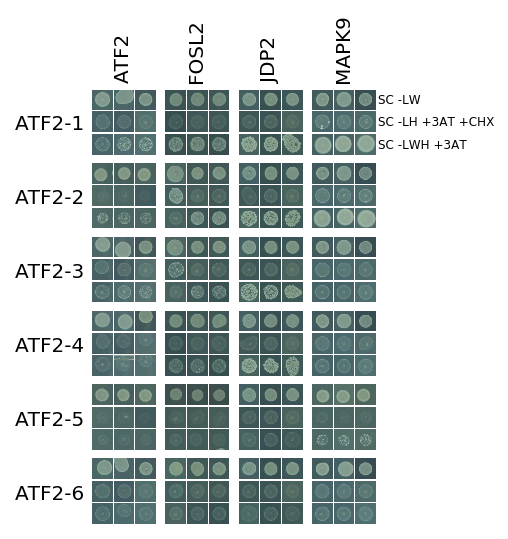

In [5]:
tf_gene = 'ATF2'
selections={    'ad_clone_acc': y2h.loc[(y2h['category'] == 'tf_isoform_ppis') &
                                   (y2h['ad_gene_symbol'] == tf_gene),
                                   'ad_clone_acc'].unique(),
                'db_gene_symbol': y2h.loc[(y2h['category'] == 'tf_isoform_ppis') &
                                   (y2h['ad_gene_symbol'] == tf_gene),
                                   'db_gene_symbol'].unique(),
                'media': ['LW', 'CX', 'AT'],
                'rep': ['A', 'B', 'C']} 
labels={'media': ['SC -LW', 'SC -LH +3AT +CHX', 'SC -LWH +3AT'],
            'rep': [],
            'ad_clone_acc': [isoform_display_name(clone_acc) for clone_acc in selections['ad_clone_acc']]}
cropped_yeast_figure(y2h.loc[(y2h['category'] == 'tf_isoform_ppis') &
                             (y2h['ad_gene_symbol'] == tf_gene), :],
                     selections,
                     filename_expression='{standard_batch}.{media}.rep{rep}',
                     single_colony_images_dir='/Users/lukelambourne/Work/y2h_cropped_images/individual_cropped_images',
                     labels=labels)
plt.savefig('/Users/lukelambourne/Desktop/test2.pdf',
            bbox_inches='tight',
            dpi=600)

In [ ]:
# add diagram with growth score numbers next to images